In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from utils.utils import ExtractionData


In [22]:
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1, 0,1,1, 1, 1, 0]  # Valores reales
y_pred = [0, 0, 0, 1, 1, 1,0,1, 1, 0]  # Predicciones

cm = confusion_matrix(y_true, y_pred)
print(cm)


[[3 1]
 [2 4]]


In [3]:
range(0.01, 0.5, 0.02)

TypeError: 'float' object cannot be interpreted as an integer

In [2]:
tn, fp, fn

(5437, 175, 796)

FN	FP	TN	    TP	    Precisión	Sensibilidad (Recall)	Especificidad
796	175	5437	592	    0.7718	    0.4265	                0.9688
291	428	1645	2247	0.8400	    0.8853	                0.7935
300	412	1661	2238	0.8445	    0.8818	                0.8013
300	412	1661	2238	0.8445	    0.8818	                0.8013

In [25]:
cm_dict

{'TN': 3, 'FP': 1, 'FN': 2, 'TP': 4}

In [3]:
util = ExtractionData()   # Creamos un objeto de la clase ExtractionData

data = util.read_csv('data','data_prep.csv')        # Importamos la data

data.head(2)

INFO:utils.utils:Reading data from data\data_prep.csv


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [3]:
data_smoteenn = util.smoteenn_resample(data,'Exited')
data_smoteenn.head(2)

INFO:utils.utils:SMOTEEN RESAMPLING


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,822,0,1,50,7,0.00,2,1,1,10062.80,0
1,528,0,1,31,6,102016.72,2,0,0,80181.12,0


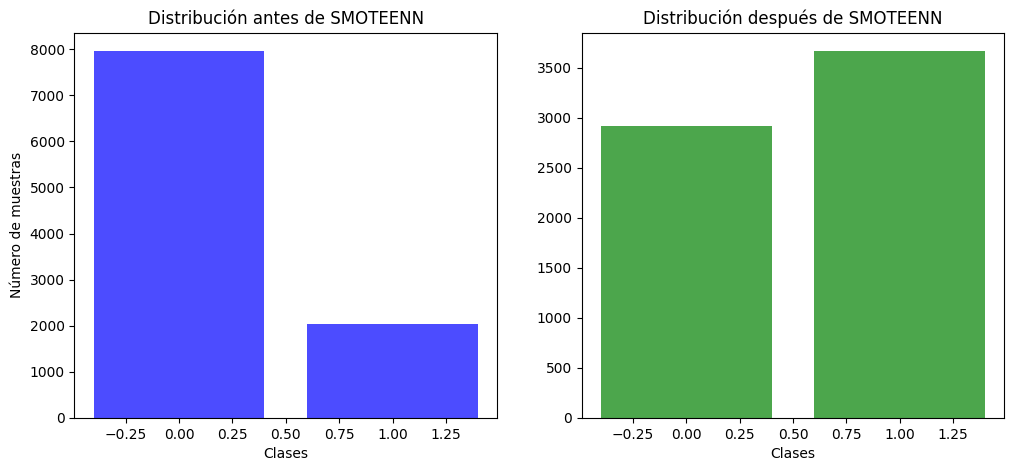

In [4]:
from test_resample import plot_contrast_distribution

plot_contrast_distribution(data, data_smoteenn, 'Exited')   

In [5]:
from test_resample import contrast_stats
contrast_stats(data, data_smoteenn)

Estadísticas antes del muestreo:
         CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584  

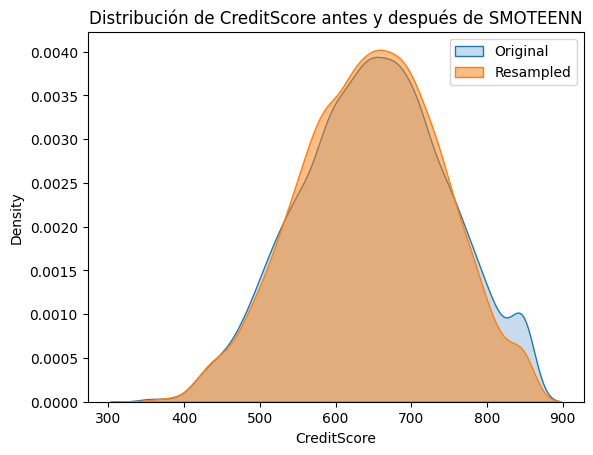

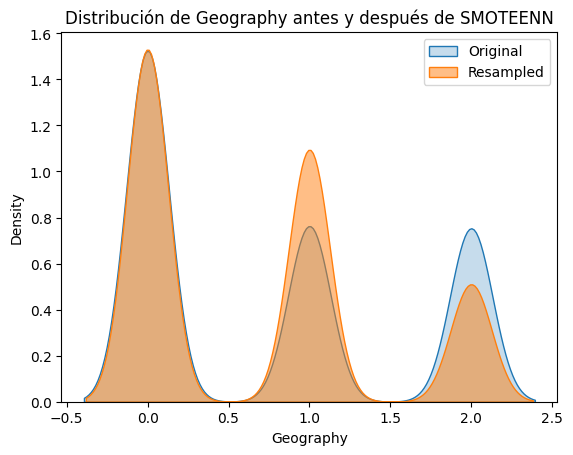

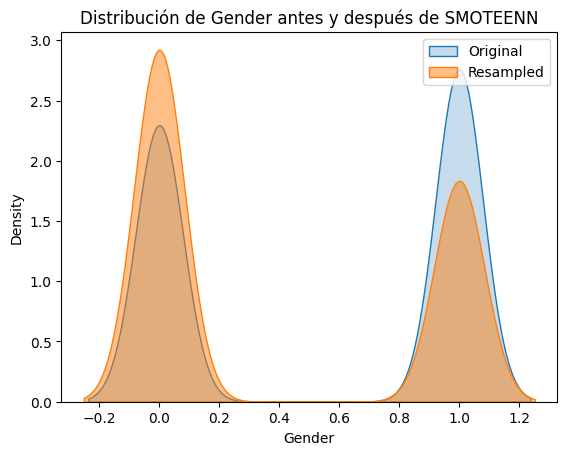

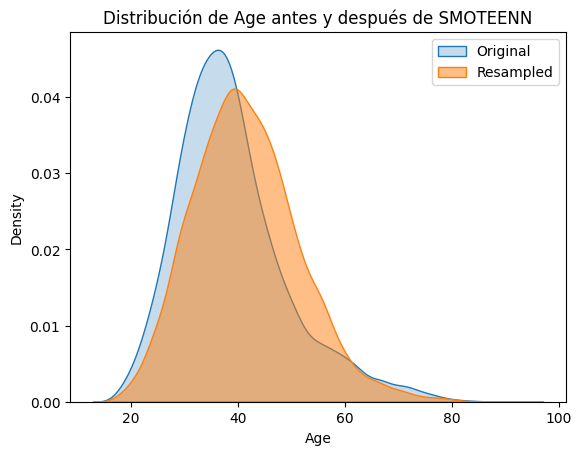

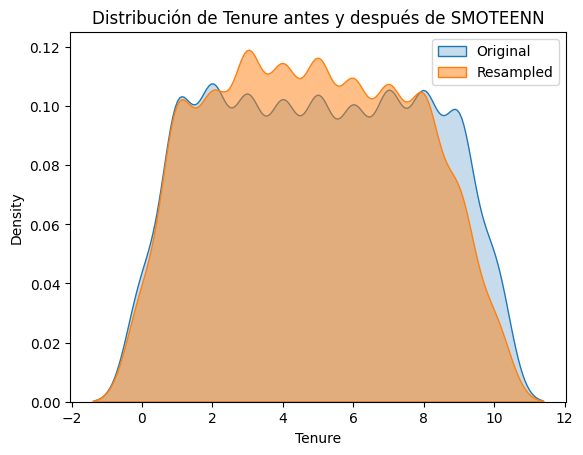

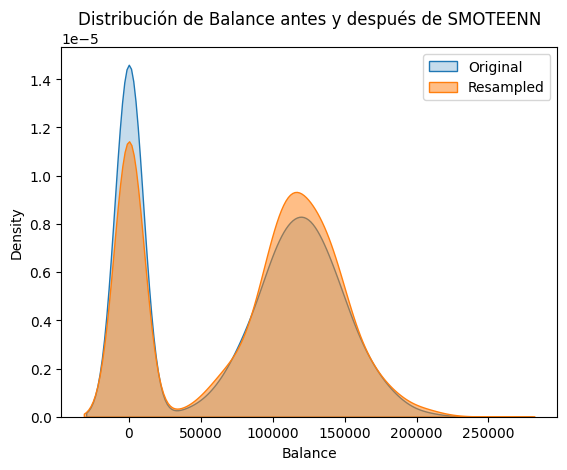

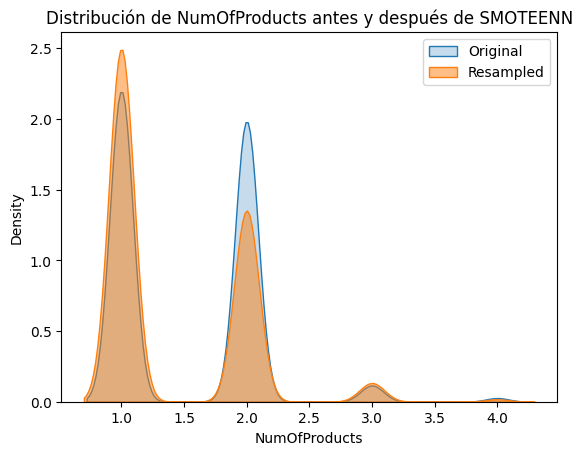

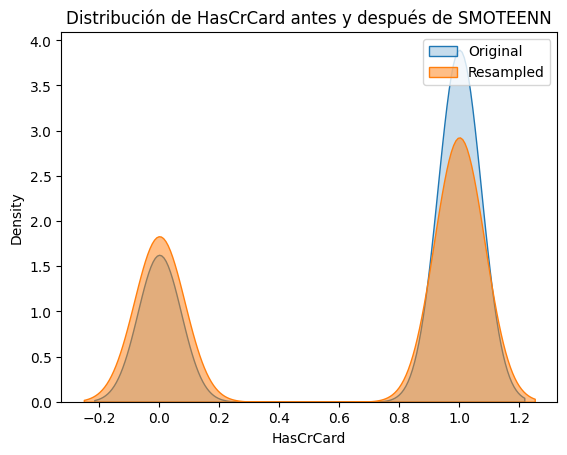

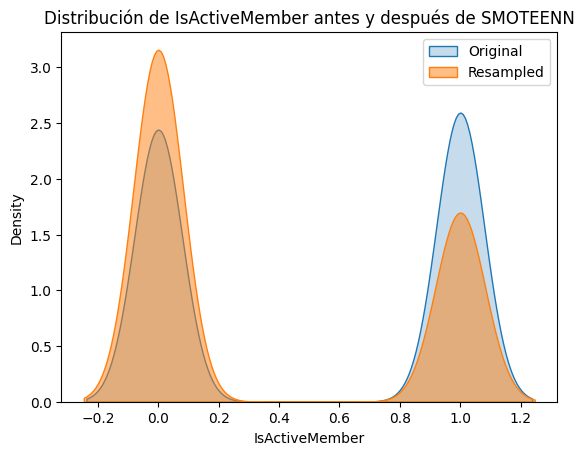

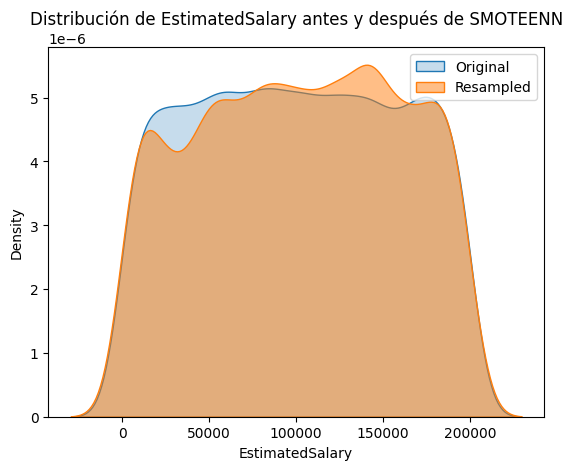

In [6]:
from test_resample import constast_distributions
constast_distributions(data, data_smoteenn)

In [7]:
X = data.drop(data.columns[-1], axis = 1)
y = data[data.columns[-1]]

smotee_nn = SMOTEENN(random_state=69)
x_resampled, y_resampled = smotee_nn.fit_resample(X,y)

data_smoteenn = pd.DataFrame(x_resampled, columns = X.columns)

data_smoteenn['Exited'] = pd.Series(y_resampled)

data_smoteenn.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,822,0,1,50,7,0.00,2,1,1,10062.80,0
1,528,0,1,31,6,102016.72,2,0,0,80181.12,0


# Comparar las distribuciones antes y después del muestreo

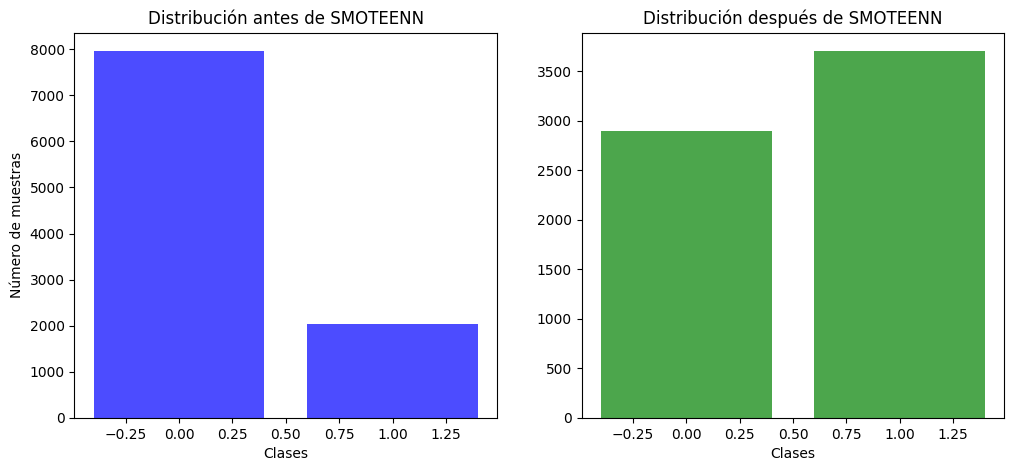

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.combine import SMOTEENN

# Supongamos que X e y son tus datos originales
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# Contar la distribución antes y después
original_counts = Counter(y)
resampled_counts = Counter(y_resampled)

# Graficar las distribuciones
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(original_counts.keys(), original_counts.values(), color='blue', alpha=0.7)
ax[0].set_title("Distribución antes de SMOTEENN")
ax[0].set_xlabel("Clases")
ax[0].set_ylabel("Número de muestras")

ax[1].bar(resampled_counts.keys(), resampled_counts.values(), color='green', alpha=0.7)
ax[1].set_title("Distribución después de SMOTEENN")
ax[1].set_xlabel("Clases")

plt.show()


# Comparar estadísticas de las características antes y después

In [14]:
import pandas as pd

# Convertir a DataFrame para facilitar la comparación
df_original = pd.DataFrame(X, columns=X.columns)  # Nombres de las columnas
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)

# Comparar estadísticas
stats_original = df_original.describe()
stats_resampled = df_resampled.describe()

# Mostrar comparaciones
print("Estadísticas antes del muestreo:\n", stats_original)
print("\nEstadísticas después del muestreo:\n", stats_resampled)


Estadísticas antes del muestreo:
         CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584  

# Evaluar la calidad de los datos generados por SMOTE

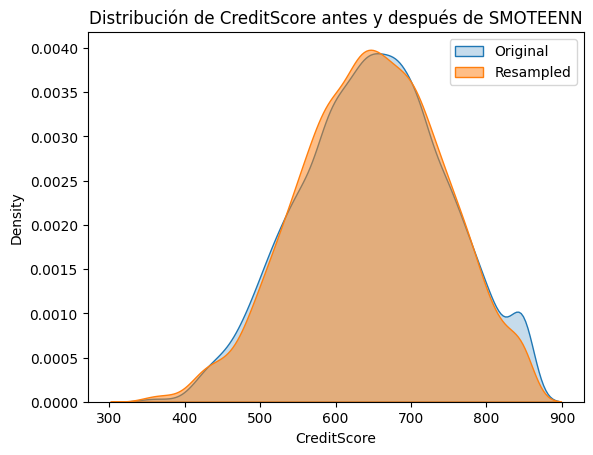

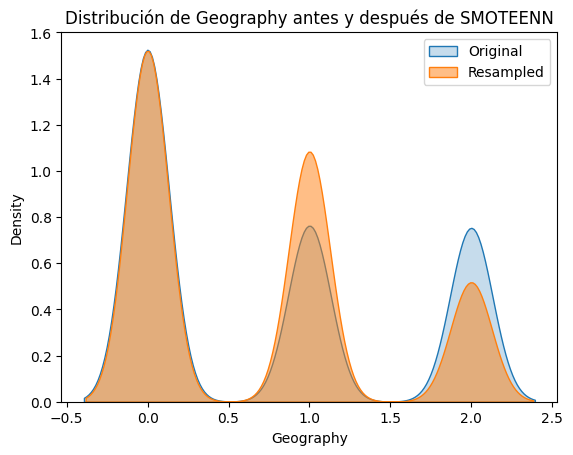

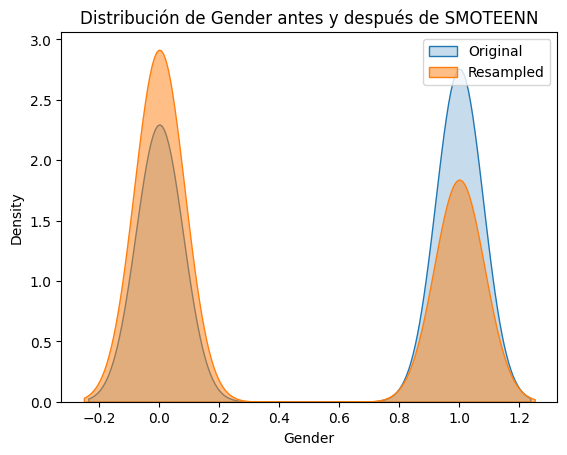

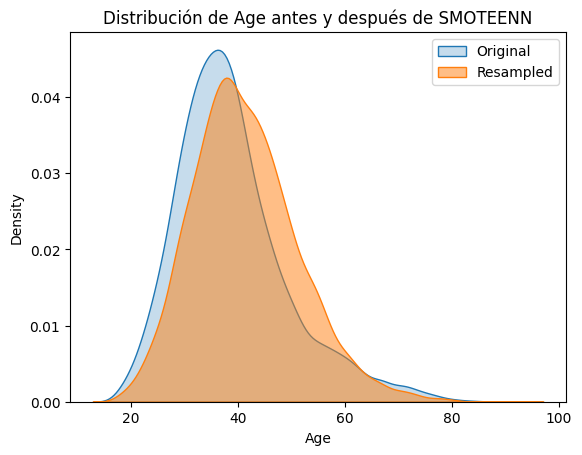

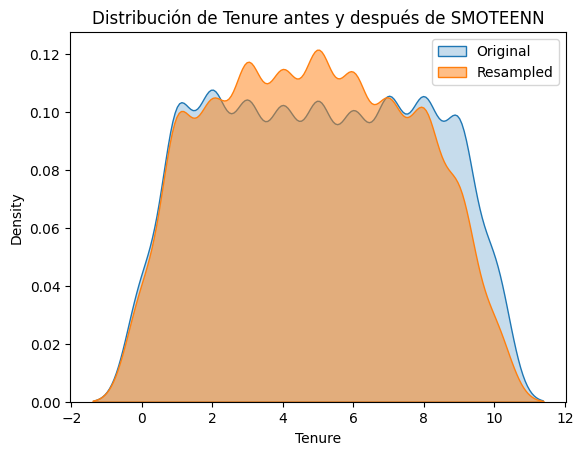

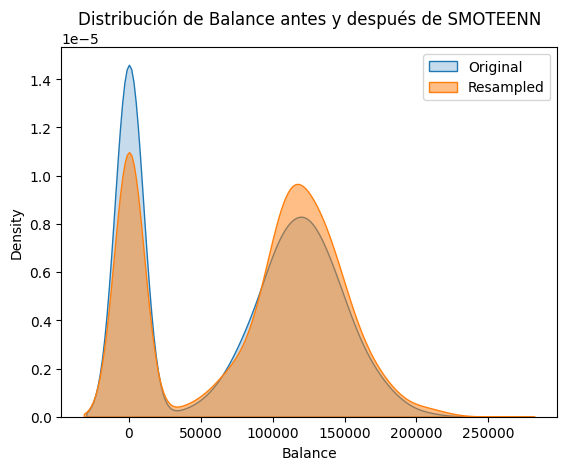

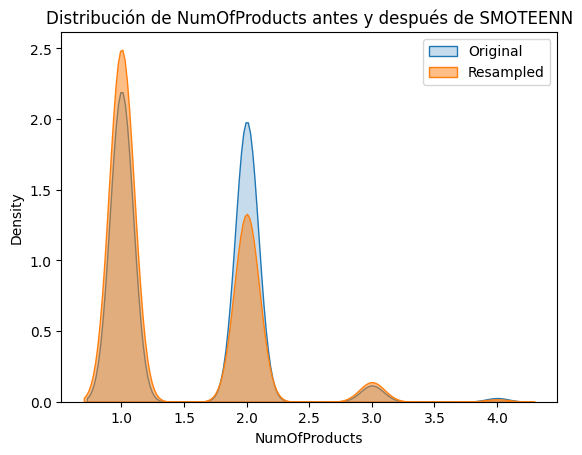

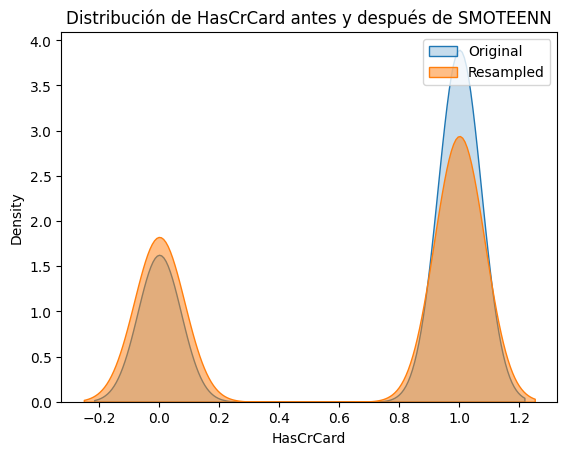

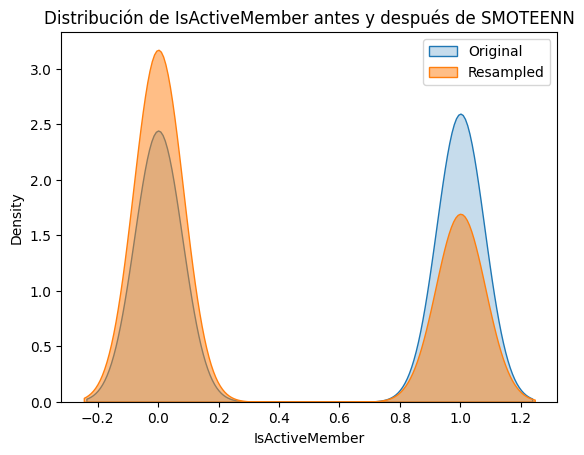

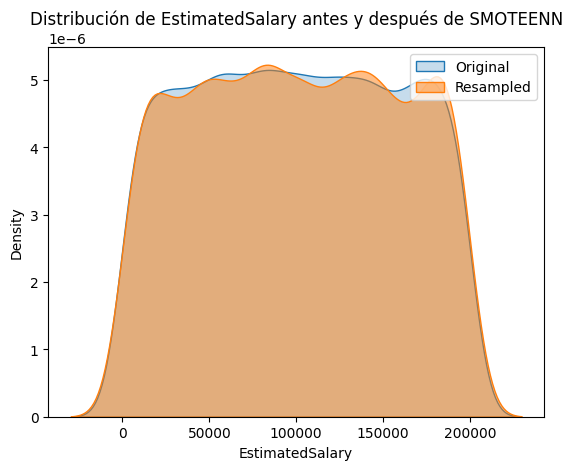

In [16]:
import seaborn as sns

col = 'col_1'  # Reemplaza con el nombre de una característica

for col in X.columns:
    sns.kdeplot(df_original[col], label="Original", fill=True)
    sns.kdeplot(df_resampled[col], label="Resampled", fill=True, alpha=0.5)
    plt.title(f"Distribución de {col} antes y después de SMOTEENN")
    plt.legend()
    plt.show()
    print(' ')
